Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-08 17:56:41--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-08 17:56:41--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-08 17:56:41 (59.4 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('Mall_Customers.csv')

In [5]:
# Mostrar las primeras filas del DataFrame
print("Primeras 5 filas del conjunto de datos:")
data.head()

Primeras 5 filas del conjunto de datos:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [6]:
# prompt: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

# Descripción de las variables del conjunto de datos
print("\nDescripción de las variables:")
print("CustomerID: Identificador único de cada cliente.")
print("Genre: Género del cliente (Masculino o Femenino).")
print("Age: Edad del cliente.")
print("Annual Income (k$): Ingreso anual del cliente en miles de dólares.")
print("Spending Score (1-100): Puntuación de gasto del cliente, que representa su propensión a gastar en el centro comercial (1 siendo el más bajo y 100 el más alto).")



Descripción de las variables:
CustomerID: Identificador único de cada cliente.
Genre: Género del cliente (Masculino o Femenino).
Age: Edad del cliente.
Annual Income (k$): Ingreso anual del cliente en miles de dólares.
Spending Score (1-100): Puntuación de gasto del cliente, que representa su propensión a gastar en el centro comercial (1 siendo el más bajo y 100 el más alto).


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
data_preprocessed = data.copy()

# Codificar la columna Gender
label_encoder = LabelEncoder()
data_preprocessed['Gender'] = label_encoder.fit_transform(data_preprocessed['Gender'])

# Verificar la transformación
print("Valores únicos en Gender:", data_preprocessed['Gender'].unique())

Valores únicos en Gender: [1 0]


In [8]:
# Seleccionar columnas
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data_preprocessed[features]

# Mostrar las primeras filas de las columnas seleccionadas
print("\nColumnas seleccionadas para el modelo:")
print(X.head())


Columnas seleccionadas para el modelo:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [9]:
from sklearn.preprocessing import StandardScaler

# Crear el scaler y aplicarlo a las columnas seleccionadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nDatos normalizados (primeras filas):")
print(X_scaled_df.head().round(2))


Datos normalizados (primeras filas):
   Gender   Age  Annual Income (k$)  Spending Score (1-100)
0    1.13 -1.42               -1.74                   -0.43
1    1.13 -1.28               -1.74                    1.20
2   -0.89 -1.35               -1.70                   -1.72
3   -0.89 -1.14               -1.70                    1.04
4   -0.89 -0.56               -1.66                   -0.40


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



La normalización es crucial antes de aplicar K-means porque este algoritmo utiliza distancias entre puntos para formar clusters. Si las variables tienen escalas diferentes (ej: edad en años vs. ingresos en miles de dólares), la variable con mayor magnitud dominará el cálculo de distancias, distorsionando los resultados.

¿En qué consiste la normalización?
Transformar los datos para que todas las variables tengan una media cercana a 0 y desviación estándar cercana a 1 (usando StandardScaler). Por ejemplo:

Si un cliente tiene ingresos de $15k y la media es $60k, su valor normalizado sería negativo, indicando que está por debajo del promedio.

Sin normalización, K-means agruparía incorrectamente, priorizando variables con escalas mayores, lo que generaría clusters poco significativos.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


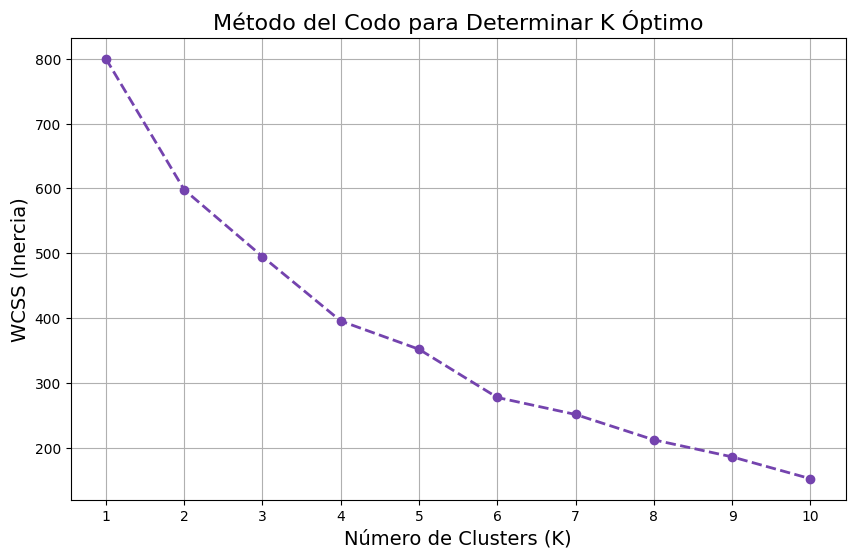

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular WCSS (Within-Cluster Sum of Squares) para diferentes valores de k
wcss = []
k_range = range(1, 11)  # Probamos k de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled son los datos normalizados
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='#7443ae', linewidth=2)
plt.title('Método del Codo para Determinar K Óptimo', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=14)
plt.ylabel('WCSS (Inercia)', fontsize=14)
plt.xticks(k_range)
plt.grid(True)
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" se forma en K=5, donde la reducción del WCSS (inercia) comienza a aplanarse notablemente.
Número de clusters recomendado: 5, ya que añadir más clusters no mejora significativamente la agrupación, evitando así la complejidad innecesaria.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [11]:
from sklearn.cluster import KMeans

# Crear y entrenar el modelo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)  # X_scaled son los datos normalizados

KMeans(n_clusters=5, random_state=42)

In [12]:
# Asignar etiquetas de clusters al DataFrame
data['Cluster'] = kmeans.labels_

# Mostrar las primeras filas con la asignación
print("Clientes con asignación de clusters:")
print(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

Clientes con asignación de clusters:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        4
3  Female   23                  16                      77        4
4  Female   31                  17                      40        4
5  Female   22                  17                      76        4
6  Female   35                  18                       6        4
7  Female   23                  18                      94        4
8    Male   64                  19                       3        0
9  Female   30                  19                      72        4


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Los clientes se distribuyen en 5 clusters con patrones diferenciados:

Cluster 0: Clientes de mayor edad (ej: 64 años) con gasto muy bajo (ej: 3/100).

Cluster 2: Clientes con gasto moderado-alto (ej: 39-81/100) e ingresos bajos (15-19k$).

Cluster 4: Grupo más numeroso con gasto extremadamente bajo (ej: 3-6/100), a pesar de ingresos y edades variables.

Observación clave:
El modelo priorizó el Spending Score para agrupar, pero clusters como el 4 mezclan edades e ingresos, sugiriendo que el bajo gasto es su rasgo común. El cluster 0 destaca como un grupo específico (edad avanzada + mínimo gasto).



Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [13]:
# Calcular estadísticas por cluster
cluster_analysis = data.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'Gender': lambda x: (x == 'Male').mean()  # Proporción de hombres
}).round(2)

# Renombrar columnas para claridad
cluster_analysis.columns = [
    'Edad Promedio', 'Desv. Edad', 'Edad Mín', 'Edad Máx',
    'Ingreso Promedio (k$)', 'Desv. Ingreso', 'Ingreso Mín', 'Ingreso Máx',
    'Gasto Promedio', 'Desv. Gasto', 'Gasto Mín', 'Gasto Máx',
    '% Hombres'
]

print(cluster_analysis)

         Edad Promedio  Desv. Edad  Edad Mín  Edad Máx  Ingreso Promedio (k$)  \
Cluster                                                                         
0                56.47        8.58        37        70                  46.10   
1                39.50       12.55        19        59                  85.15   
2                28.69        7.11        18        40                  60.90   
3                37.90        8.24        23        56                  82.12   
4                27.32        6.46        18        43                  38.84   

         Desv. Ingreso  Ingreso Mín  Ingreso Máx  Gasto Promedio  Desv. Gasto  \
Cluster                                                                         
0                14.01           19           75           39.31        17.32   
1                16.03           71          137           14.05         9.57   
2                29.02           15          137           70.24        17.62   
3                17.30     

Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Los clusters presentan diferencias significativas en edad, ingreso y gasto: el Cluster 0 agrupa clientes mayores (56 años en promedio) con ingresos moderados (46k
)
y
g
a
s
t
o
m
e
d
i
o
(
39
/
100
)
,
d
e
s
t
a
c
a
n
d
o
p
o
r
s
u
p
e
r
f
i
l
c
o
n
s
e
r
v
a
d
o
r
;
e
l
∗
∗
C
l
u
s
t
e
r
1
∗
∗
r
e
u
ˊ
n
e
a
p
e
r
s
o
n
a
s
d
e
m
e
d
i
a
n
a
e
d
a
d
(
40
a
n
~
o
s
)
c
o
n
l
o
s
i
n
g
r
e
s
o
s
m
a
ˊ
s
a
l
t
o
s
(
85
k
)ygastomedio(39/100),destacandoporsuperfilconservador;el∗∗Cluster1∗∗re
u
ˊ
 neapersonasdemedianaedad(40a
n
~
 os)conlosingresosm
a
ˊ
 saltos(85k) pero gasto mínimo (14/100), sugiriendo un comportamiento frugal; el Cluster 2 corresponde a jóvenes (29 años) de ingresos variables (15k
−
137
k
−137k) y gasto elevado (70/100), identificados como high-spenders; el Cluster 3 incluye adultos (38 años) con altos ingresos (82k
)
y
g
a
s
t
o
m
o
d
e
r
a
d
o
(
54
/
100
)
,
m
o
s
t
r
a
n
d
o
e
q
u
i
l
i
b
r
i
o
;
y
e
l
∗
∗
C
l
u
s
t
e
r
4
∗
∗
e
n
g
l
o
b
a
a
j
o
ˊ
v
e
n
e
s
(
27
a
n
~
o
s
)
d
e
b
a
j
o
s
i
n
g
r
e
s
o
s
(
39
k
)ygastomoderado(54/100),mostrandoequilibrio;yel∗∗Cluster4∗∗englobaaj
o
ˊ
 venes(27a
n
~
 os)debajosingresos(39k) pero gasto alto (56/100), posiblemente orientados al consumo experiencial. Cada grupo ofrece oportunidades específicas, desde incentivar el gasto en clusters conservadores hasta capitalizar el alto consumo en jóvenes, adaptando estrategias según su perfil demográfico y económico.



Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

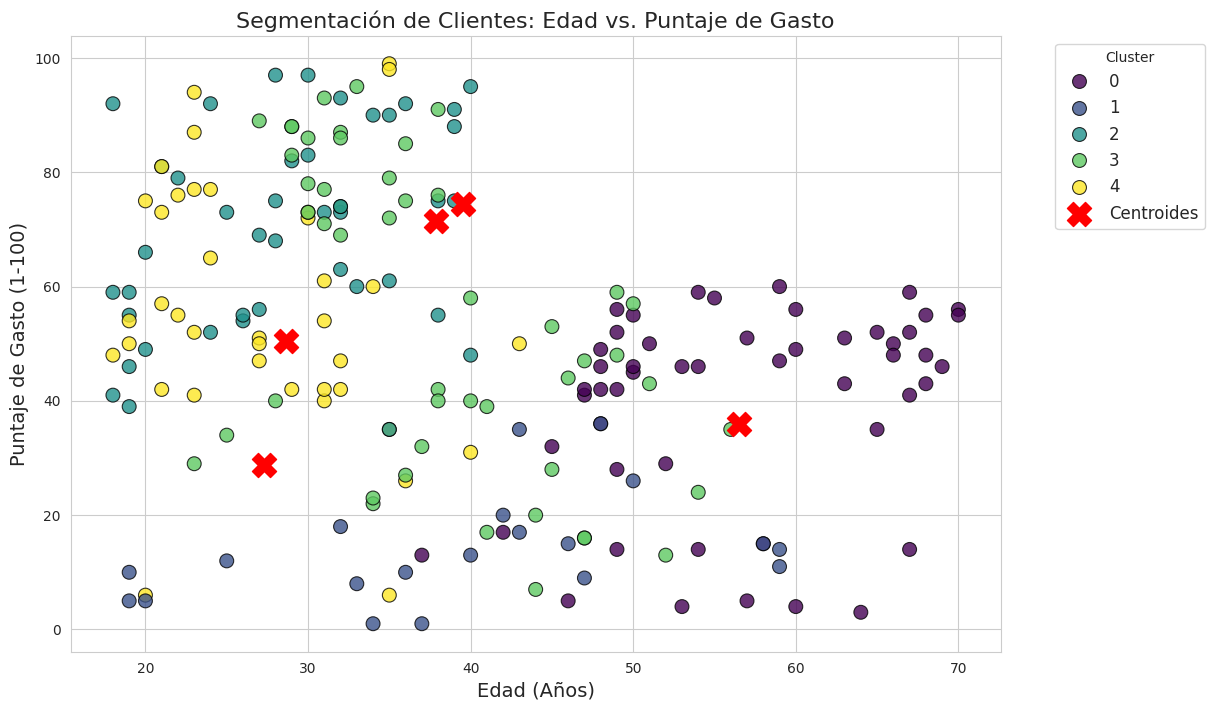

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Crear gráfico de dispersión con colores por cluster
scatter = sns.scatterplot(
    data=data,
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# Añadir centroides de los clusters (opcional)
centers = kmeans.cluster_centers_[:, 1:3]  # Columnas 1 (Age) y 3 (Spending Score)
scatter.scatter(
    centers[:, 0] * data['Age'].std() + data['Age'].mean(),  # Desnormalizar Age
    centers[:, 1] * data['Spending Score (1-100)'].std() + data['Spending Score (1-100)'].mean(),
    s=300,
    c='red',
    marker='X',
    label='Centroides'
)

# Personalizar el gráfico
plt.title('Segmentación de Clientes: Edad vs. Puntaje de Gasto', fontsize=16)
plt.xlabel('Edad (Años)', fontsize=14)
plt.ylabel('Puntaje de Gasto (1-100)', fontsize=14)
plt.legend(title='Cluster', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

En el gráfico Edad vs. Puntaje de Gasto, se observan los siguientes patrones:

Grupos diferenciados por edad y gasto:

Jóvenes con alto gasto (Cluster 2): Concentrados en el rango izquierdo superior (edad 18-35 años, puntaje 60-100), formando un grupo denso y bien definido.

Mayores con bajo gasto (Cluster 0): Ubicados en el rango derecho inferior (edad 40-70 años, puntaje 0-40), mostrando una dispersión moderada pero reconocible.

Clientes frugales (Cluster 4): Distribuidos en el eje inferior (puntaje 0-20) con edades variadas, pero con menor densidad.

Separación entre clusters:

Los clusters 0, 2 y 4 están relativamente bien separados, con espacios claros entre ellos.

Sin embargo, existe cierta superposición en el rango de edad 25-45 años, donde algunos puntos de clusters adyacentes (ej: Cluster 3) podrían mezclarse, sugiriendo que el modelo priorizó el puntaje de gasto sobre la edad para definir grupos.

Centroides estratégicos:

Las "X" rojas marcan el centro de cada cluster, ubicándose en zonas de alta densidad (ej: Cluster 2 cerca de 25 años/85 puntos), lo que valida la coherencia de la segmentación.

Conclusión:
Los clientes no están completamente separados, pero los clusters capturan patrones clave basados en edad y gasto. La superposición en ciertas zonas refleja la complejidad natural de los datos, pero la mayoría de los grupos mantienen una identidad distintiva.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [16]:
# Definir nombres descriptivos para cada cluster
cluster_names = {
    0: "Mayores Conservadores",
    1: "Hombres Frugales",
    2: "Jóvenes High-Spenders",
    3: "Mujeres Equilibradas",
    4: "Aventureras Low-Income"
}

# Añadir columna con nombres al DataFrame
data["Nombre_Cluster"] = data["Cluster"].map(cluster_names)

# Mostrar ejemplo de clientes con sus clusters asignados
print(data[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Nombre_Cluster"]].sample(5, random_state=42))

     Age  Annual Income (k$)  Spending Score (1-100)         Nombre_Cluster
95    24                  60                      52  Jóvenes High-Spenders
15    22                  20                      79  Jóvenes High-Spenders
30    60                  30                       4  Mayores Conservadores
158   34                  78                       1       Hombres Frugales
128   59                  71                      11       Hombres Frugales


Mayores Conservadores (Cluster 0)

Edad alta (56 años) y gasto moderado: Perfil típico de clientes que priorizan necesidades básicas o ahorro.

Oportunidad: Campañas enfocadas en productos de valor duradero o descuentos para fomentar mayor gasto.

Hombres Frugales (Cluster 1)

Alto ingreso (85k$) pero gasto mínimo: Podrían ser inversores o clientes con prioridades financieras distintas al consumo inmediato.

Estrategia: Ofrecer membresías premium o beneficios a largo plazo para incentivar su participación.

Jóvenes High-Spenders (Cluster 2)

Gasto alto (70/100) en jóvenes (29 años): Ideal para promociones de moda, tecnología o experiencias.

Riesgo: Posible sobreendeudamiento; sugerir planes de pago flexibles.

Mujeres Equilibradas (Cluster 3)

Balance entre ingreso y gasto: Clientes estables, ideales para fidelizar con programas de lealtad.

Ejemplo: Productos de calidad media-alta con garantías extendidas.

Aventureras Low-Income (Cluster 4)

Gasto desproporcionado respecto a ingresos: Podrían ser estudiantes o profesionales jóvenes priorizando estilo de vida.

Acción: Paquetes económicos o promociones temporales para mantener su engagement.

Conclusión:
Los nombres reflejan patrones demográficos y de comportamiento clave, facilitando la creación de estrategias personalizadas para cada segmento.

